# Example usage

To use `ssppy` in a project:

In [4]:
import ssppy as spy

print(spy.__version__)

0.1.0


In [5]:
from ssppy.reader_functions import *
from ssppy.visibility_functions import *
from ssppy.shadow_functions import *
from ssppy.power_functions import *
from ssppy.energy_functions import *

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy

In [7]:
data = pd.read_fwf('GMAT_TEST_DATA_5_YR_GEO_SK.txt')
data

,DefaultSC.UTCGregorian,DefaultSC.ElapsedDays,DefaultSC.EarthFixed.X,DefaultSC.EarthFixed.Y,DefaultSC.EarthFixed.Z,Sun.EarthFixed.X,Sun.EarthFixed.Y,Sun.EarthFixed.Z
0,01 Jan 2000 11:59:28.000,0.000000,7559.611353,41480.952527,-1.057679,1.353586e+08,2.266850e+06,-5.755367e+07
1,01 Jan 2000 12:16:08.000,0.011574,7604.779466,41469.275566,532.297186,1.351666e+08,-7.570830e+06,-5.755151e+07
2,01 Jan 2000 14:01:23.181,0.084666,7805.651341,41267.747089,3721.552987,1.178203e+08,-6.668783e+07,-5.753782e+07
3,01 Jan 2000 16:12:21.034,0.175614,7719.527232,40931.234138,6544.925394,6.305959e+07,-1.198095e+08,-5.752060e+07
4,01 Jan 2000 18:27:36.678,0.269545,7366.191179,40875.671081,7261.259950,-1.425836e+07,-1.346461e+08,-5.750259e+07
...,...,...,...,...,...,...,...,...
21541,31 Dec 2004 03:58:47.914,1825.666203,9183.819670,39808.199494,-6488.483360,-6.983538e+07,1.159185e+08,-5.765840e+07
21542,31 Dec 2004 06:11:19.561,1825.758236,7948.044140,40028.515775,-7090.574381,4.850521e+06,1.352495e+08,-5.764197e+07
21543,31 Dec 2004 08:23:26.777,1825.849986,7160.989356,40768.656280,-5263.305243,7.777110e+07,1.107676e+08,-5.762549e+07
21544,31 Dec 2004 10:36:31.760,1825.942405,7220.586692,41521.923427,-1639.798801,1.257870e+08,4.997311e+07,-5.760875e+07


In [8]:
ground_station_coords = np.array([17, 78, 500])
ground_station_coords = geodetic_to_ECEF(ground_station_coords)
min_elevation_angle = 30 # degrees

In [9]:
spy.visibility_functions.geodetic_to_ECEF(ground_station_coords)

array([5599.3446907 , 2912.11884843, -931.84271377])

In [10]:
initial_power = 1_000_000_000 # 1GW
annual_deg_rate = 0.03 # in %

In [11]:
power_values = []

for i in range(data.shape[0]):
  sat_coords = read_sat_coords(data, i)
  sun_coords = read_sun_coords(data, i)
  elapsed_days = read_elapsed_days(data, i) ############ make sure data contains this column

  V = visibility(ground_station_coords, sat_coords, min_elevation_angle)
  S = shadow(sat_coords, sun_coords)# shadow value

  dist_power_factor = dist_factor(sat_coords, sun_coords)
  deg_power_factor = deg_factor(annual_deg_rate, elapsed_days)
  current_max_power = current_power(initial_power, dist_power_factor, deg_power_factor) ## note accounting for visibility or shadow
  power = power_calculation(current_max_power, V, S)
  
  # appending to list of power values
  power_values.append(power)

In [12]:
power_data = pd.DataFrame({'Elapsed Days': data['DefaultSC.ElapsedDays'], 'Power': power_values})
total_energy = energy_calculation(power_data)

In [13]:
total_days = power_data['Elapsed Days'].iloc[-1]
yearly_output = yearly_energy_output(total_energy, total_days)
"{:_}".format(yearly_output) + " kWh"

'7_999_946_912.853038 kWh'

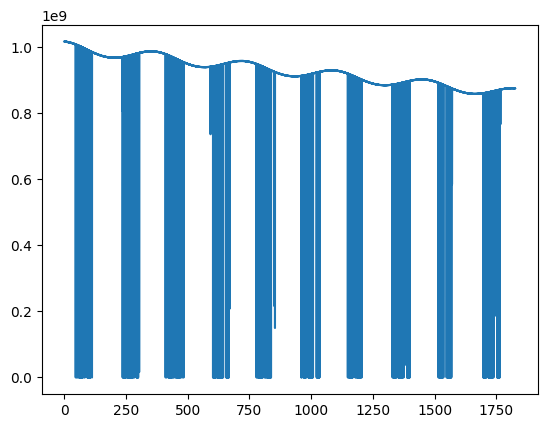

In [14]:
plt.plot(power_data['Elapsed Days'], power_data['Power'])